# Trabajo final master UCM

En este trabajo se busca predecir si un cliente tomara una oferta de fin de anio o no

## Carga inicial de librerias utiles y data

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from statistics import mean
import plotly.express as px
from sklearn.preprocessing import RobustScaler
import datetime
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from category_encoders.one_hot import OneHotEncoder
import matplotlib.ticker as mtick

In [402]:
# Si se desea descargar el dataset directamente del servidor de kaggle, requiere user password
# od.download("https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset")


## Descripcion de las columnas

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
2. ID - Unique ID of each customer
3. Year_Birth - Age of the customer
4. Complain - 1 if the customer complained in the last 2 years
5. Dt_Customer - date of customer's enrollment with the company
6. Education - customer's level of education
7. Marital - customer's marital status
8. Kidhome - number of small children in customer's household
9. Teenhome - number of teenagers in customer's household
10. Income - customer's yearly household income
11. MntFishProducts - the amount spent on fish products in the last 2 years
12. MntMeatProducts - the amount spent on meat products in the last 2 years
13. MntFruits - the amount spent on fruits products in the last 2 years
14. MntSweetProducts - amount spent on sweet products in the last 2 years
15. MntWines - the amount spent on wine products in the last 2 years
16. MntGoldProds - the amount spent on gold products in the last 2 years
17. NumDealsPurchases - number of purchases made with discount
18. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
19. NumStorePurchases - number of purchases made directly in stores
20. NumWebPurchases - number of purchases made through the company's website
21. NumWebVisitsMonth - number of visits to company's website in the last month
22. Recency - number of days since the last purchase

## Exploracion inicial al dataset original

In [403]:
# Lectura de los datos
df = pd.read_csv("../data/superstore_data.csv")
base = df

In [404]:
# 2240 filas x 22 columnas
base.shape

(2240, 22)

In [405]:
# Distribucion de la variable objetivo
cuenta = base["Response"].value_counts()

In [406]:
sns.set_theme(style="white", palette=("Accent"))

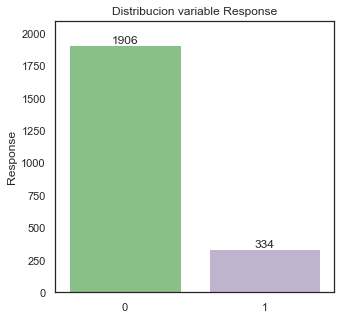

In [407]:
# Grafico de distribucion de la variable objetivo
# plot data
fig, ax = plt.subplots(figsize=(5, 5))
d = sns.barplot(x=base.Response.value_counts().index, y=cuenta, ax=ax)
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
ax.set_title('Distribucion variable Response')
plt.show()
fig.savefig('../img/objetivo.png')

In [408]:
# En porcentajes
porcentajes = base.Response.value_counts(normalize=True) * 100
porcentajes

0   85.09
1   14.91
Name: Response, dtype: float64

In [409]:
# Descripcion basica de los datos a analizar
base.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.00,NaN,NaN,NaN,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,NaN,NaN,NaN,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.00,NaN,NaN,NaN,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Kidhome,2240.00,NaN,NaN,NaN,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,NaN,NaN,NaN,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Dt_Customer,2240,663,8/31/2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.00,NaN,NaN,NaN,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntWines,2240.00,NaN,NaN,NaN,303.94,336.60,0.00,23.75,173.50,504.25,1493.00


Algunas observaciones:

- Check los outliers especificamente en income y las compras de articulos
- Year birth tiene fechas de nacimiento del siglo antepasado

In [410]:
# Descripcion del tipo de dato de cada columna
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [411]:
# Duplicados
# No hay duplicados
print(base.duplicated().sum())

0


In [412]:
# Encontrar valores nulos
# Solo seria la columna income, valores en porcentaje
base.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Income                1.07
Id                    0.00
MntFishProducts       0.00
Response              0.00
NumWebVisitsMonth     0.00
NumStorePurchases     0.00
NumCatalogPurchases   0.00
NumWebPurchases       0.00
NumDealsPurchases     0.00
MntGoldProds          0.00
MntSweetProducts      0.00
MntMeatProducts       0.00
Year_Birth            0.00
MntFruits             0.00
MntWines              0.00
Recency               0.00
Dt_Customer           0.00
Teenhome              0.00
Kidhome               0.00
Marital_Status        0.00
Education             0.00
Complain              0.00
dtype: float64

### Plots basicos de analisis

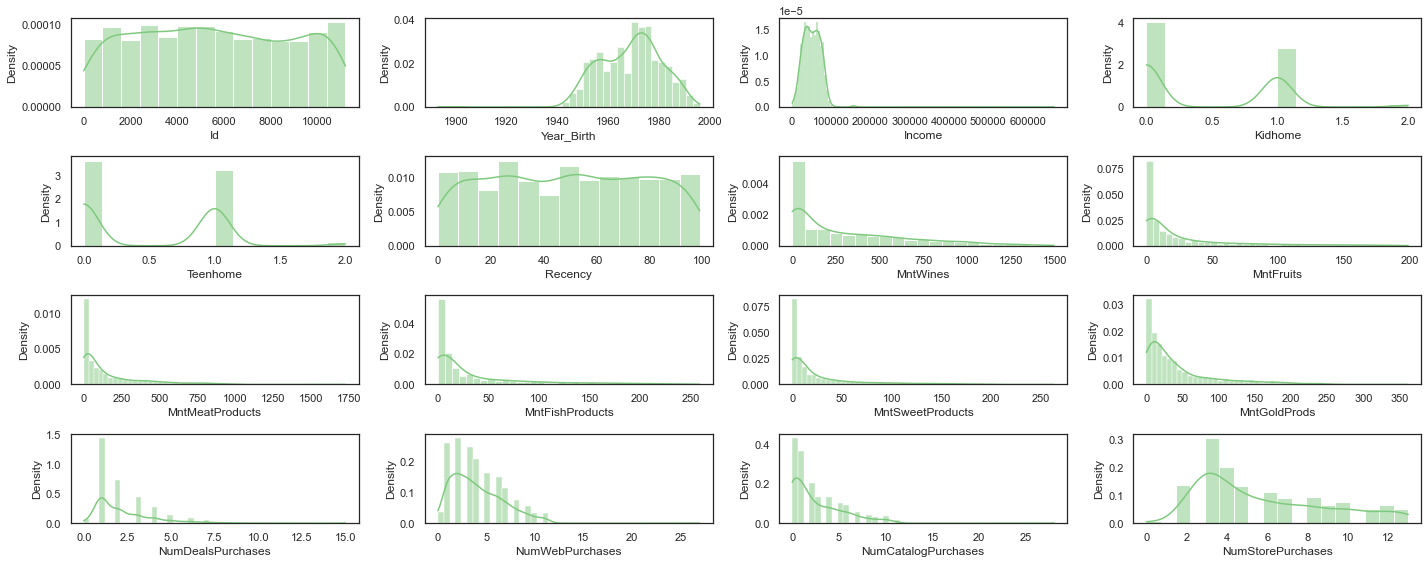

In [413]:
# Histograma de las columnas de pandas
# base.hist(figsize=(13,13))
# plt.show()

# select the columns to be plotted
cols = base.select_dtypes(exclude=['object'])

# create the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,8))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=base[col], kde=True, stat='density', ax=ax)
fig.tight_layout()
plt.show()


## Feature engineering

Hay variables que probablemente se deban transformar

Se estudian en particular

- Pasar a categoricas
- Imputar valores nulos
- Outliers

### Numericas

In [414]:
data = base.copy()

In [415]:
# Calculo anio
today = datetime.date.today()
year = today.year

In [416]:
# Se elimina la columna ID
data.drop(columns=["Id"], inplace= True)

In [417]:
# La columna Dt_Customer pasa a contar solo con el anio
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [418]:
# Se crea una columna edad que es la resta del anio actual con el de la columna
data["Edad"] = year - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year)
data["Edad"].sort_values()

562      27
1824     27
697      28
1468     28
964      28
       ... 
1740     82
2171     83
2233    123
827     124
513     130
Name: Edad, Length: 2240, dtype: int64

In [419]:
# La columna edad tiene valores "excesivos" son posibles outliers
data[data["Edad"]> 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad
513,1893,2n Cycle,Single,60182.00,0,1,2014-05-17,23,8,0,...,0,2,1,1,0,2,4,0,0,130
827,1899,PhD,Together,83532.00,0,0,2013-09-26,36,755,144,...,64,224,1,4,6,4,1,0,0,124
2233,1900,2n Cycle,Divorced,36640.00,1,0,2013-09-26,99,15,6,...,4,25,1,2,1,2,5,0,1,123


In [420]:
# Es mejor eliminarlos
data.drop(data[data["Edad"] > 100].index, inplace=True)

In [421]:
# La columna Dt_Customer puede entregar algunas columnas adicionales interesantes
# Anio de registro
data["Dt_Customer_year"] = data["Dt_Customer"].apply(lambda x: x.year)

# Semestre
data["Dt_Customer_q"] = data["Dt_Customer"].apply(lambda x: x.quarter)

# Mes
data["Dt_Customer_m"] = data["Dt_Customer"].apply(lambda x: x.month)


In [422]:
data.Dt_Customer_m

0        6
1        6
2        5
3       11
4        8
        ..
2235     7
2236     1
2237     3
2238    11
2239     1
Name: Dt_Customer_m, Length: 2237, dtype: int64

In [423]:
# Se calcula el tiempo de participacion
data['tiempo_participacion'] = year - data.Dt_Customer_year 

In [424]:
data.tiempo_participacion

0        9
1        9
2        9
3        9
4        9
        ..
2235    10
2236    10
2237    11
2238    11
2239    11
Name: tiempo_participacion, Length: 2237, dtype: int64

In [425]:
# Columna Income se imputa por la media los valores nulos 
data = data.fillna(data.mean(numeric_only=True))

In [426]:
# Check
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Year_Birth             0.00
Education              0.00
Dt_Customer_m          0.00
Dt_Customer_q          0.00
Dt_Customer_year       0.00
Edad                   0.00
Complain               0.00
Response               0.00
NumWebVisitsMonth      0.00
NumStorePurchases      0.00
NumCatalogPurchases    0.00
NumWebPurchases        0.00
NumDealsPurchases      0.00
MntGoldProds           0.00
MntSweetProducts       0.00
MntFishProducts        0.00
MntMeatProducts        0.00
MntFruits              0.00
MntWines               0.00
Recency                0.00
Dt_Customer            0.00
Teenhome               0.00
Kidhome                0.00
Income                 0.00
Marital_Status         0.00
tiempo_participacion   0.00
dtype: float64

In [427]:
# Se agrega una nueva columna para saber el total gastado en compras por cliente
col_list = ["MntFishProducts","MntMeatProducts","MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds"]
data['Total_Compras'] = data[col_list].sum(axis=1)

### Revision de categoricas

Tratamiento de categoricas, recategorizar levels etc


    "Education", Se debe recategorizar
    "Marital_Status", Se debe recategorizar
    "Kidhome", niveles 0,1,2
    "Teenhome",mismo anterior
    "Complain",
    "Dt_Customer_year"
    "Dt_Customer_q"
    "Dt_Customer_q"

In [428]:
data.Dt_Customer_year.value_counts()

2013    1187
2014     556
2012     494
Name: Dt_Customer_year, dtype: int64

In [429]:
data.Education.value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [430]:
data['Education'] = data['Education'].replace('2n Cycle', 'Master')
data.Education.value_counts()

Graduation    1127
Master         571
PhD            485
Basic           54
Name: Education, dtype: int64

In [431]:
data.Marital_Status.value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [432]:
# Se recategorizan las categorias escasamente representadas
data.Marital_Status = data.Marital_Status.replace(['Alone', 'YOLO', 'Absurd', 'Widow'], 'Single')
data.Marital_Status = data.Marital_Status.replace('Together', 'Married')
data.Marital_Status.value_counts()
                                

Married     1443
Single       563
Divorced     231
Name: Marital_Status, dtype: int64

In [433]:
# Revision categoricas
categoricas = data[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain','Dt_Customer_year']]
for feature in categoricas:
        print(f'{feature}: {data[feature].unique()}')



Education: ['Graduation' 'PhD' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married']
Kidhome: [0 1 2]
Teenhome: [0 1 2]
Complain: [0 1]
Dt_Customer_year: [2014 2013 2012]


#### Plots y analisis detallado categoricas

##### Educacion

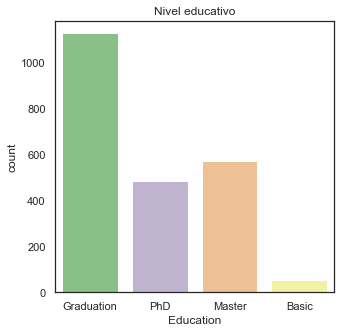

In [434]:
# Analisis nivel educativo
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Education', palette='Accent')
ax.set_title('Nivel educativo')
plt.show()
fig.savefig('../img/educacion.png')


In [435]:
print (f'Un cliente con nivel educativo graduation tiene una probabilidad de un {round(data[data["Education"]=="Graduation"]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con nivel educativo Phd tiene una probabilidad de un {round(data[data["Education"]=="PhD"]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con nivel educativo Master tiene una probabilidad de un {round(data[data["Education"]=="Master"]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con nivel educativo Basic tiene una probabilidad de un {round(data[data["Education"]=="Basic"]["Response"].mean()*100,2)} % de tomar la oferta')


Un cliente con nivel educativo graduation tiene una probabilidad de un 13.49 % de tomar la oferta
Un cliente con nivel educativo Phd tiene una probabilidad de un 20.82 % de tomar la oferta
Un cliente con nivel educativo Master tiene una probabilidad de un 13.84 % de tomar la oferta
Un cliente con nivel educativo Basic tiene una probabilidad de un 3.7 % de tomar la oferta


##### Estado civil

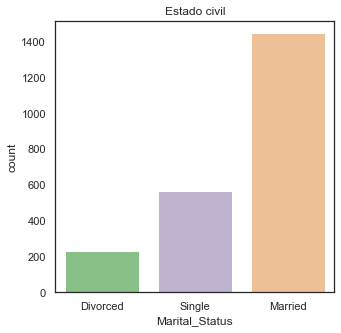

In [436]:
# Analisis estado civil
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Marital_Status', palette='Accent')
ax.set_title('Estado civil')
plt.show()
fig.savefig('../img/civil.png')

In [437]:
print (f'Un cliente con estado civil Casado tiene una probabilidad de un {round(data[data["Marital_Status"]=="Married"]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con estado civil Soltero tiene una probabilidad de un {round(data[data["Marital_Status"]=="Single"]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con estado civil Divorciado tiene una probabilidad de un {round(data[data["Marital_Status"]=="Divorced"]["Response"].mean()*100,2)} % de tomar la oferta')

Un cliente con estado civil Casado tiene una probabilidad de un 10.95 % de tomar la oferta
Un cliente con estado civil Soltero tiene una probabilidad de un 22.74 % de tomar la oferta
Un cliente con estado civil Divorciado tiene una probabilidad de un 20.78 % de tomar la oferta


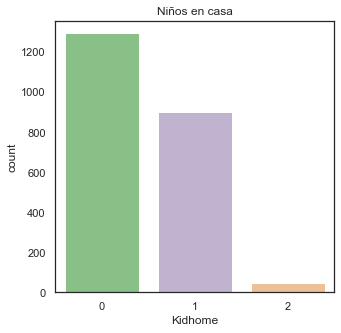

In [438]:
# Analisis kidhome
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Kidhome', palette='Accent')
ax.set_title('Niños en casa')
plt.show()
fig.savefig('../img/kids.png')

In [439]:
print (f'Un cliente sin niños tiene una probabilidad de un {round(data[data["Kidhome"]==0]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con 1 niño en casa una probabilidad de un {round(data[data["Kidhome"]==1]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con 2 niños en casa una probabilidad de un {round(data[data["Kidhome"]==2]["Response"].mean()*100,2)} % de tomar la oferta')

Un cliente sin niños tiene una probabilidad de un 17.2 % de tomar la oferta
Un cliente con 1 niño en casa una probabilidad de un 12.25 % de tomar la oferta
Un cliente con 2 niños en casa una probabilidad de un 4.17 % de tomar la oferta


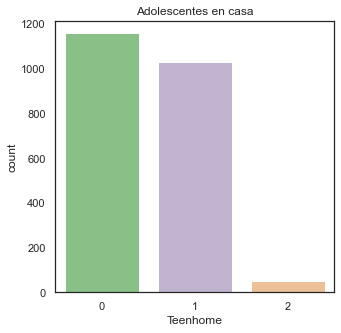

In [440]:
# Analisis teenhome
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Teenhome', palette='Accent')
ax.set_title('Adolescentes en casa')
plt.show()
fig.savefig('../img/teen.png')

In [441]:
print (f'Un cliente sin adolescentes en casa tiene una probabilidad de un {round(data[data["Teenhome"]==0]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con 1 adolescentes en casa tiene una probabilidad de un {round(data[data["Teenhome"]==1]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con 2 adolescentes en casa una probabilidad de un {round(data[data["Kidhome"]==2]["Response"].mean()*100,2)} % de tomar la oferta')

Un cliente sin adolescentes en casa tiene una probabilidad de un 20.5 % de tomar la oferta
Un cliente con 1 adolescentes en casa tiene una probabilidad de un 8.94 % de tomar la oferta
Un cliente con 2 adolescentes en casa una probabilidad de un 4.17 % de tomar la oferta


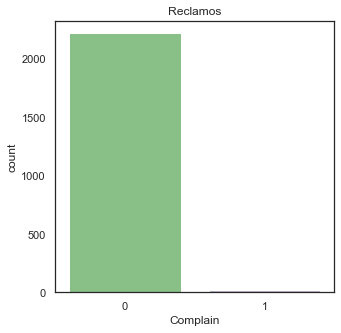

In [442]:
# Analisis reclamos
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Complain', palette='Accent')
ax.set_title('Reclamos')
plt.show()
fig.savefig('../img/reclamos.png')

In [443]:
print (f'Un cliente sin reclamos tiene una probabilidad de  {round(data[data["Complain"]==0]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente con algun reclamo tiene una probabilidad de {round(data[data["Complain"]==1]["Response"].mean()*100,2)} % de tomar la oferta')

Un cliente sin reclamos tiene una probabilidad de  14.93 % de tomar la oferta
Un cliente con algun reclamo tiene una probabilidad de 15.0 % de tomar la oferta


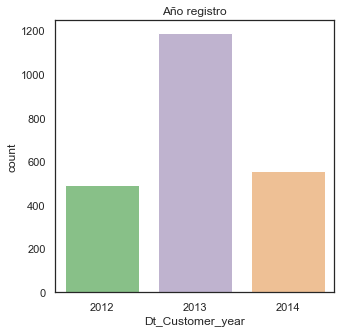

In [444]:
# Analisis anio registro
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Dt_Customer_year', palette='Accent')
ax.set_title('Año registro')
plt.show()
fig.savefig('../img/aregistro.png')

In [445]:
print (f'Un cliente registrado el 2012 tiene una probabilidad de {round(data[data["Dt_Customer_year"]==2012]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente registrado el 2013 tiene una probabilidad de {round(data[data["Dt_Customer_year"]==2013]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Un cliente registrado el 2013 tiene una probabilidad de {round(data[data["Dt_Customer_year"]==2014]["Response"].mean()*100,2)} % de tomar la oferta')

Un cliente registrado el 2012 tiene una probabilidad de 26.72 % de tomar la oferta
Un cliente registrado el 2013 tiene una probabilidad de 12.97 % de tomar la oferta
Un cliente registrado el 2013 tiene una probabilidad de 8.63 % de tomar la oferta


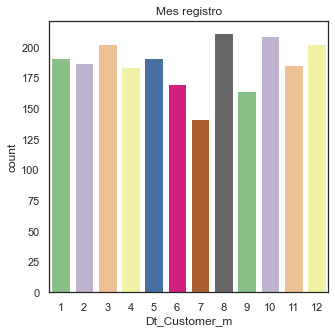

In [446]:
# Analisis mes
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Dt_Customer_m', palette='Accent')
ax.set_title('Mes registro')
plt.show()
fig.savefig('../img/mregistro.png')

In [447]:
# fig = px.histogram(data, x='Kidhome', color="Response",width=400, height=400)
# fig.show()


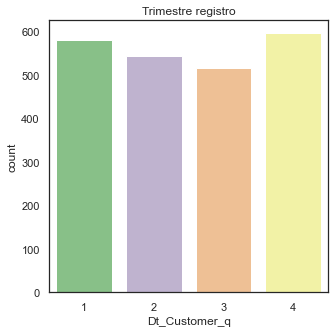

In [448]:
# Analisis semestre
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = data, x ='Dt_Customer_q', palette='Accent')
ax.set_title('Trimestre registro')
plt.show()
fig.savefig('../img/sregistro.png')

### Plots y analisis detallado para compras

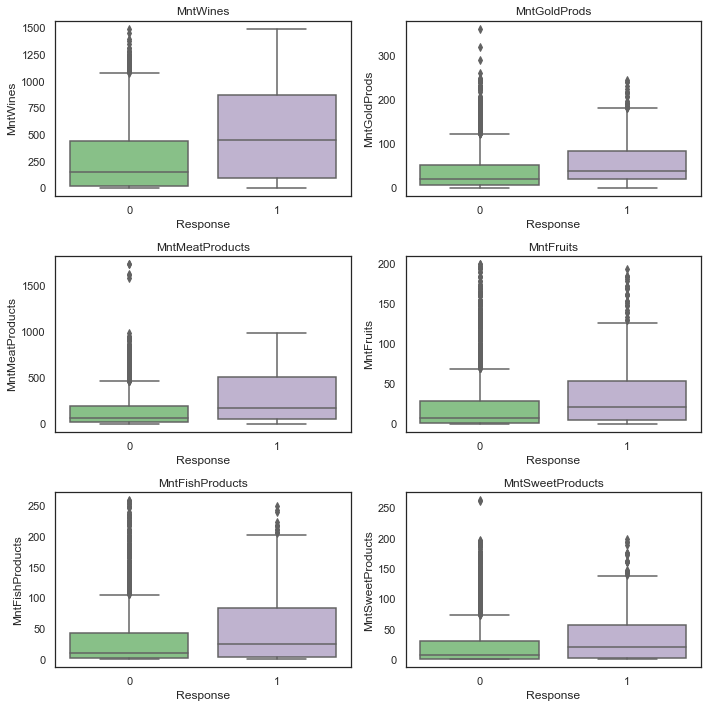

In [449]:

# Boxplot para saber niveles de respuesta a oferta
columnas = data[
    [
        "MntWines",
        "MntGoldProds",
        "MntMeatProducts",
        "MntFruits",
        "MntFishProducts",
        "MntSweetProducts",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(columnas):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Response"], data[variable], palette='Accent')
    plt.tight_layout()
    plt.title(variable)
    plt.savefig('../img/compras_{}.png'.format(i), format="PNG")   # Guarda en formato png
plt.show()


A mayor monto que se ha gastado en los items descritos en los plots de arriba, aumenta el nivel de respuesta positiva a la campana

### Plots y analisis detallado para tipo de compras 

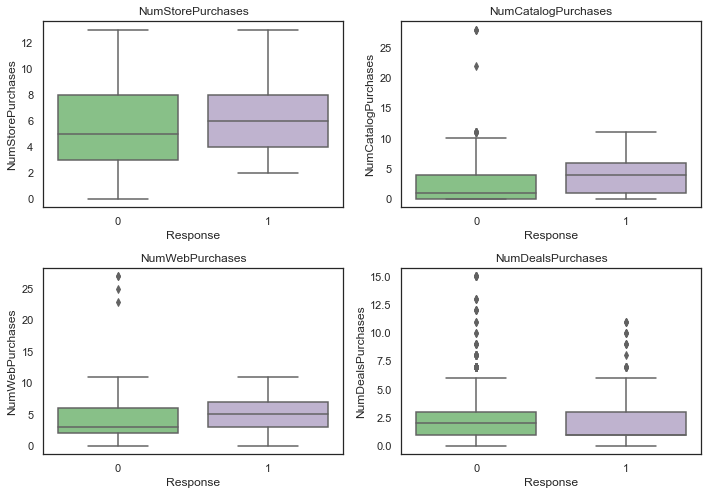

In [450]:
# Boxplot para saber niveles de respuesta a oferta
columnas = data[
    [
        "NumStorePurchases",
        "NumCatalogPurchases",
        "NumWebPurchases",
        "NumDealsPurchases",
        
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(columnas):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Response"], data[variable], palette='Accent')
    plt.tight_layout()
    plt.title(variable)
    # plt.savefig('../img/lugar_{}.png'.format(i), format="PNG")   # Guarda en formato png
plt.show()

### Total gastado vs tipo de compras

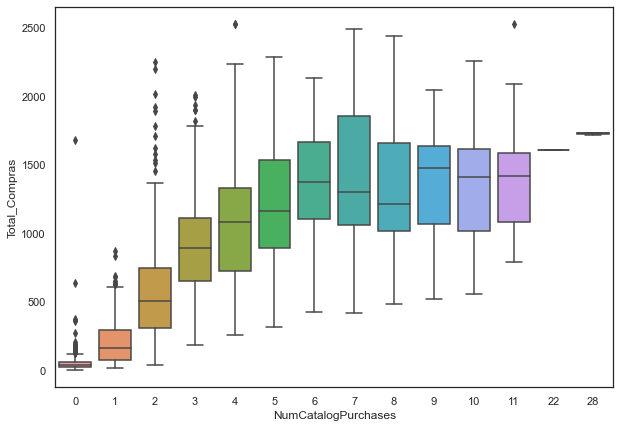

In [451]:
sns.boxplot(y="Total_Compras", x="NumCatalogPurchases", data=data, orient="vertical")
plt.show()

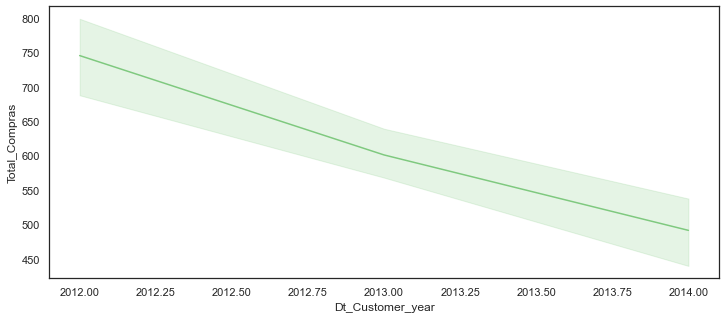

In [452]:
plt.figure(figsize=(12, 5))
sns.lineplot(y = data.Total_Compras, x = data.Dt_Customer_year)
plt.show()

### Plots y analisis detallado tipo de visitas

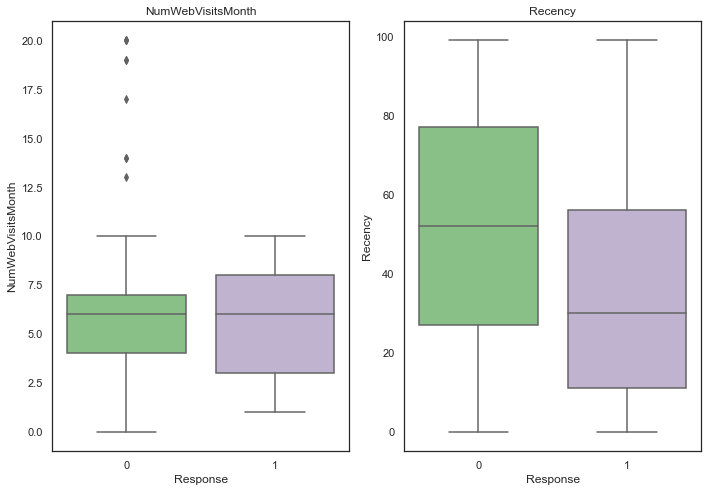

In [290]:
# Boxplot para saber niveles de respuesta a oferta
columnas = data[
    [
        "NumWebVisitsMonth",
        "Recency"
        
    ]
].columns.tolist()
# plt.figure(figsize=(15, 10))

for i, variable in enumerate(columnas):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data["Response"], data[variable], palette='Accent')
    plt.tight_layout()
    plt.title(variable)
    plt.savefig('../img/visitas_{}.png'.format(i), format="PNG")   # Guarda en formato png
plt.show()

In [182]:
print (f'Visitas a la web {round(data[data["NumWebVisitsMonth"]==0]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Visitas a la web {round(data[data["NumWebVisitsMonth"]==1]["Response"].mean()*100,2)} % de tomar la oferta')

Visitas a la web 0.0 % de tomar la oferta
Visitas a la web 19.74 % de tomar la oferta


In [181]:
print (f'Recency {round(data[data["Recency"]==0]["Response"].mean()*100,2)} % de tomar la oferta')
print (f'Recency {round(data[data["Recency"]==1]["Response"].mean()*100,2)} % de tomar la oferta')

Recency 25.0 % de tomar la oferta
Recency 37.5 % de tomar la oferta


### Plots y analisis detallado edad, tiempo de participacion, income y total gastos

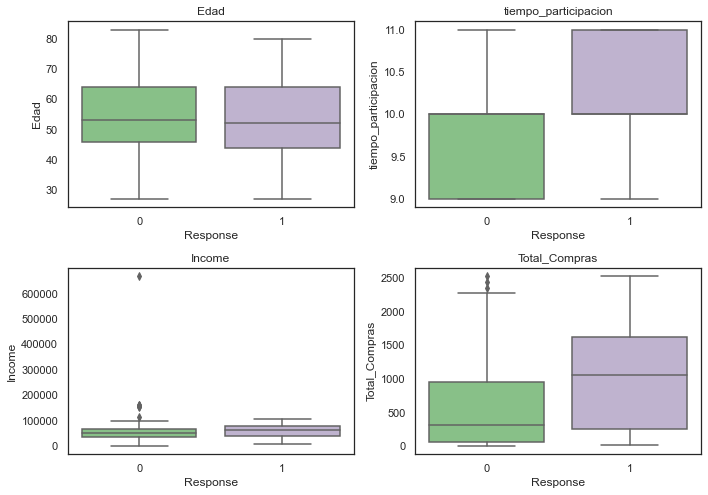

In [282]:
# Boxplot para saber niveles de respuesta a oferta
columnas = data[
    [
        "Edad",
        "tiempo_participacion",
        "Income",
        "Total_Compras"
    
        
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(columnas):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Response"], data[variable], palette='Accent')
    plt.tight_layout()
    plt.title(variable)
    plt.savefig('../img/varios_{}.png'.format(i), format="PNG")   # Guarda en formato png
plt.show()

### Plots

In [ ]:
#select the columns to be plotted

# cols = data.select_dtypes(include=np.number)

# #create the figure and axes
# fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
# axes = axes.ravel()  # flattening the array makes indexing easier


# for col, ax in zip(cols, axes):
#     sns.boxplot(x = data[col], data=data, orient='v', ax=ax, color = "pink")
#     plt.subplots_adjust(wspace=0.5)
#     ax.set_ylabel('')
#     fig.tight_layout()
#     plt.axis('off')
# plt.show()
    

### Analisis univariante/outliers

Se realiza un analisis a las features numericas que tambien presentan numeros fuera de rango u outliers
Como es un dataset pequeno se puede realizar de 1 a 1 pero en casos de mayot cantidad de columnas se deben crear metodos mas eficientes de quitar los valores fuera de rango

In [37]:
cols = data.select_dtypes([np.number]).columns
print (cols)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Edad', 'Dt_Customer_year', 'Dt_Customer_q',
       'Dt_Customer_m', 'tiempo_participacion', 'Total_Compras'],
      dtype='object')


In [38]:
data.shape

(2237, 27)

### 1. Income

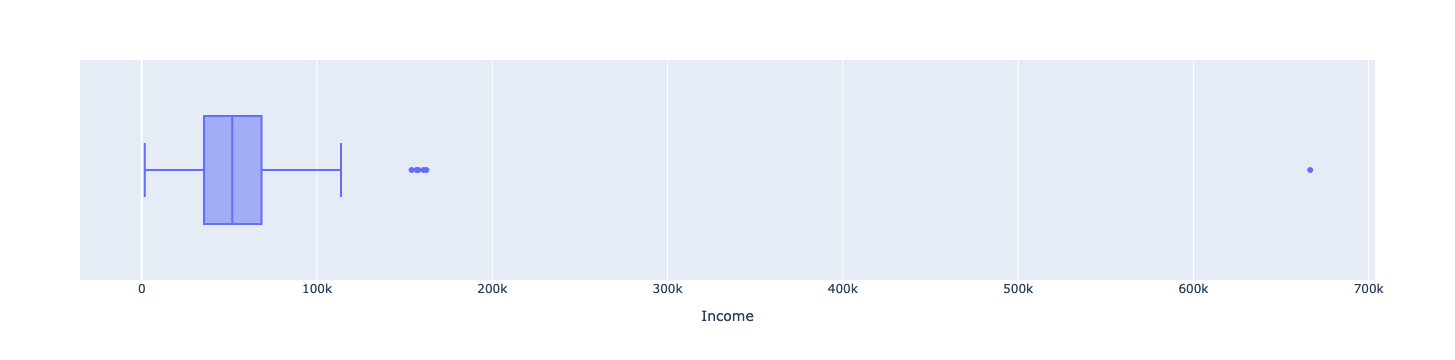

In [293]:
px.box(data_frame = data, x = 'Income')

In [294]:
# Income tiene datos que se escapan de la media
data[data["Income"] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,Dt_Customer_q,Dt_Customer_m,tiempo_participacion,Total_Compras
527,1977,Graduation,Married,666666.00,1,0,2013-02-06,23,9,14,...,3,6,0,0,46,2013,1,2,10,62


In [295]:
# Se elimina e es solo una columna
data.drop(index=data[data.Income > 300000].index, inplace=True)


### 2. MntMeatProducts

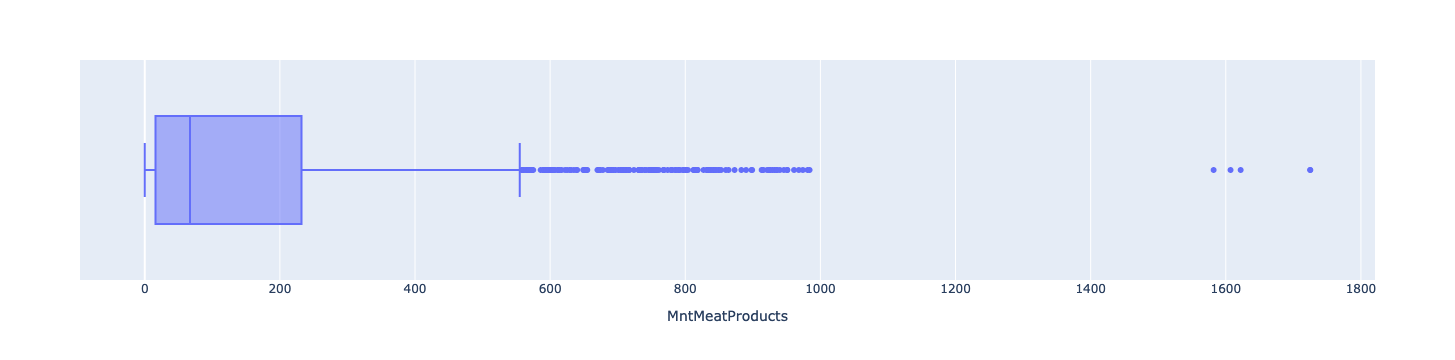

In [296]:
px.box(data_frame = data, x = 'MntMeatProducts')

In [297]:
data[data.MntMeatProducts > 1200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,Dt_Customer_q,Dt_Customer_m,tiempo_participacion,Total_Compras
325,1977,Graduation,Married,157146.00,0,0,2013-04-29,13,1,0,...,0,1,0,0,46,2013,2,4,10,1730
497,1982,PhD,Married,160803.00,0,0,2012-04-08,21,55,16,...,1,0,0,0,41,2012,2,4,11,1717
961,1979,Graduation,Married,2447.00,1,0,2013-06-01,42,1,1,...,0,1,0,0,44,2013,2,6,10,1730
1213,1978,Master,Married,52236.58,0,0,2012-12-08,53,32,2,...,1,0,0,0,45,2012,4,12,11,1679
2204,1973,PhD,Married,157243.00,0,1,2014-01-03,98,20,2,...,0,0,0,0,50,2014,1,1,9,1608


In [298]:
data.MntMeatProducts.nlargest(10)

325     1725
961     1725
497     1622
1213    1607
2204    1582
1921     984
53       981
994      974
2021     968
1338     961
Name: MntMeatProducts, dtype: int64

In [299]:
# Valores fuera de rango se dejan al ultimo valor mas alto 
data["MntMeatProducts"].clip(upper=984, inplace=True)

### 3. MntSweetProducts

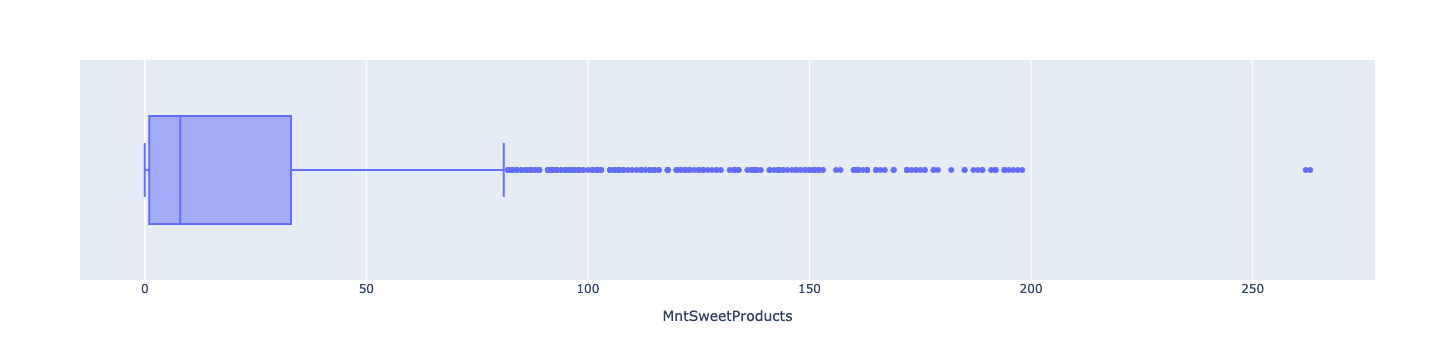

In [300]:
px.box(data_frame = data, x = 'MntSweetProducts')

In [301]:
data[data.MntSweetProducts > 200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,Dt_Customer_q,Dt_Customer_m,tiempo_participacion,Total_Compras
210,1945,PhD,Single,113734.00,0,0,2014-05-28,9,6,2,...,0,1,0,0,78,2014,2,5,9,277
449,1986,Graduation,Single,52236.58,1,0,2013-02-20,19,5,1,...,0,1,0,0,37,2013,1,2,10,637


In [302]:
data.MntSweetProducts.nlargest(10)

449     263
210     262
305     198
31      197
1502    196
2067    195
994     194
1143    194
1785    194
1055    192
Name: MntSweetProducts, dtype: int64

In [303]:
# Valores fuera de rango se dejan al ultimo valor mas alto 
data.MntSweetProducts.clip(upper=198, inplace=True)

### 4. MntGoldProds


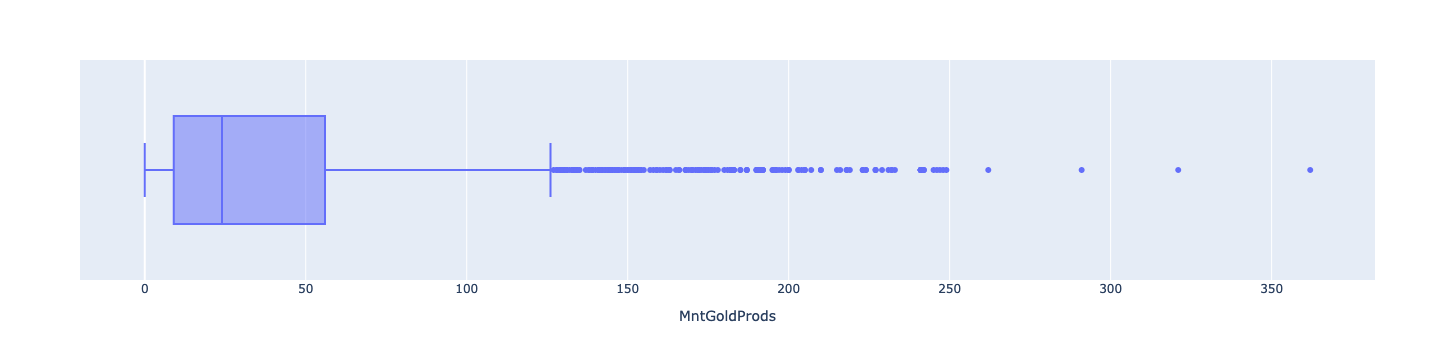

In [304]:
px.box(data_frame = data, x = 'MntGoldProds')

In [305]:
data[data.MntGoldProds > 250]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,Dt_Customer_q,Dt_Customer_m,tiempo_participacion,Total_Compras
14,1969,Graduation,Married,4428.00,0,1,2013-05-10,0,16,4,...,0,1,0,0,54,2013,2,5,10,359
60,1982,Master,Single,6560.00,0,0,2013-12-12,2,67,11,...,1,17,0,0,41,2013,4,12,10,373
449,1986,Graduation,Single,52236.58,1,0,2013-02-20,19,5,1,...,0,1,0,0,37,2013,1,2,10,637
2063,1966,PhD,Single,7144.00,0,2,2013-07-12,92,81,4,...,1,0,0,0,57,2013,3,7,10,416


In [306]:
data.MntGoldProds.nlargest()

449     362
14      321
2063    291
60      262
1789    249
Name: MntGoldProds, dtype: int64

In [307]:
# Valores fuera de rango se dejan al ultimo valor mas alto 
data.MntGoldProds.clip(upper=249, inplace=True)

### 5. NumDealsPurchases


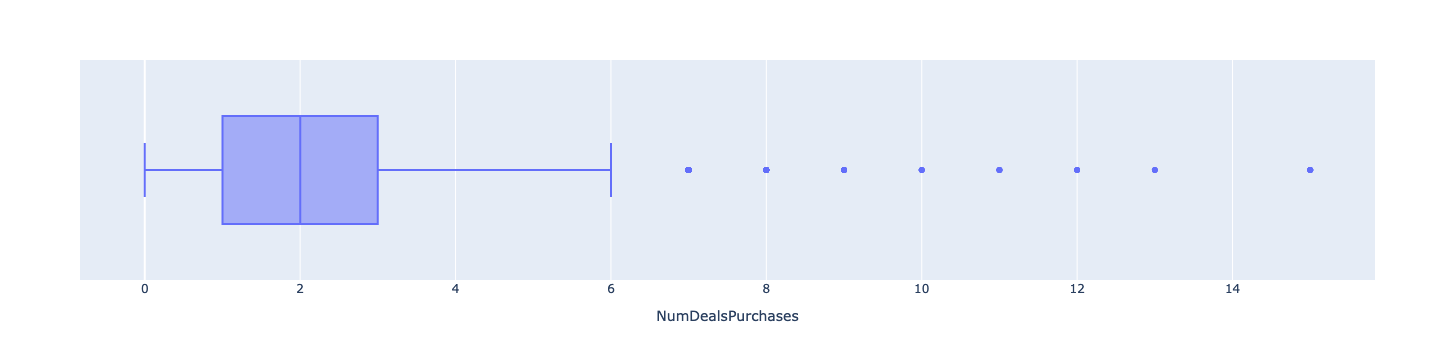

In [308]:
px.box(data_frame = data, x = 'NumDealsPurchases')

In [309]:
data[data.NumDealsPurchases > 5]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,Dt_Customer_q,Dt_Customer_m,tiempo_participacion,Total_Compras
26,1956,Graduation,Married,54450.00,1,1,2012-09-14,0,454,0,...,8,8,0,0,67,2012,3,9,11,684
27,1956,Graduation,Married,54450.00,1,1,2012-09-14,0,454,0,...,8,8,0,0,67,2012,3,9,11,684
64,1974,Master,Divorced,53367.00,1,1,2013-08-31,2,229,7,...,8,7,1,0,49,2013,3,8,10,400
100,1948,PhD,Single,60200.00,0,1,2013-02-01,3,502,19,...,11,6,0,0,75,2013,1,2,10,685
105,1949,Master,Married,62845.00,1,1,2012-01-10,3,1099,0,...,10,8,0,0,74,2012,1,1,11,1178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1973,PhD,Married,157243.00,0,1,2014-01-03,98,20,2,...,0,0,0,0,50,2014,1,1,9,1608
2210,1966,Graduation,Married,44529.00,0,1,2013-05-07,98,538,13,...,11,5,0,0,57,2013,2,5,10,691
2216,1960,PhD,Divorced,50611.00,0,1,2012-04-10,98,459,0,...,7,6,1,0,63,2012,2,4,11,493
2217,1960,PhD,Divorced,50611.00,0,1,2012-04-10,98,459,0,...,7,6,0,0,63,2012,2,4,11,493


In [310]:
data.NumDealsPurchases.nlargest(8)

497     15
663     15
961     15
1416    15
1466    15
1718    15
2204    15
1640    13
Name: NumDealsPurchases, dtype: int64

In [311]:
# Valores fuera de rango se dejan al ultimo valor mas alto 
data.NumDealsPurchases.clip(upper=13, inplace=True)

### 6. NumWebPurchases


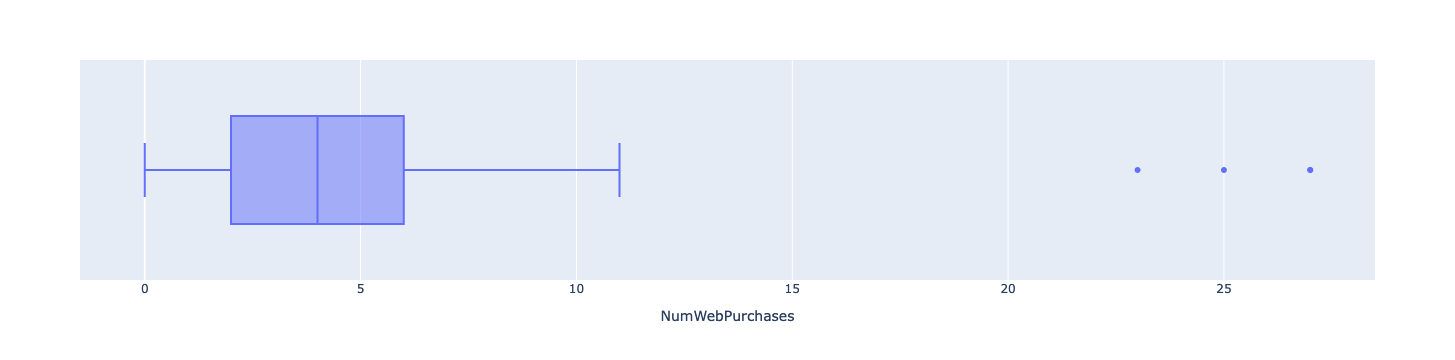

In [312]:
px.box(data_frame = data, x = 'NumWebPurchases')

In [313]:
data[data.NumWebPurchases > 20]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,Dt_Customer_q,Dt_Customer_m,tiempo_participacion,Total_Compras
14,1969,Graduation,Married,4428.00,0,1,2013-05-10,0,16,4,...,0,1,0,0,54,2013,2,5,10,359
210,1945,PhD,Single,113734.00,0,0,2014-05-28,9,6,2,...,0,1,0,0,78,2014,2,5,9,277
449,1986,Graduation,Single,52236.58,1,0,2013-02-20,19,5,1,...,0,1,0,0,37,2013,1,2,10,637
2063,1966,PhD,Single,7144.00,0,2,2013-07-12,92,81,4,...,1,0,0,0,57,2013,3,7,10,416


In [314]:
data.NumWebPurchases.nlargest()

210     27
449     27
14      25
2063    23
41      11
Name: NumWebPurchases, dtype: int64

In [315]:
# Valores fuera de rango se dejan al ultimo valor mas alto 
data.NumWebPurchases.clip(upper=11, inplace=True)

### 7. NumCatalogPurchases


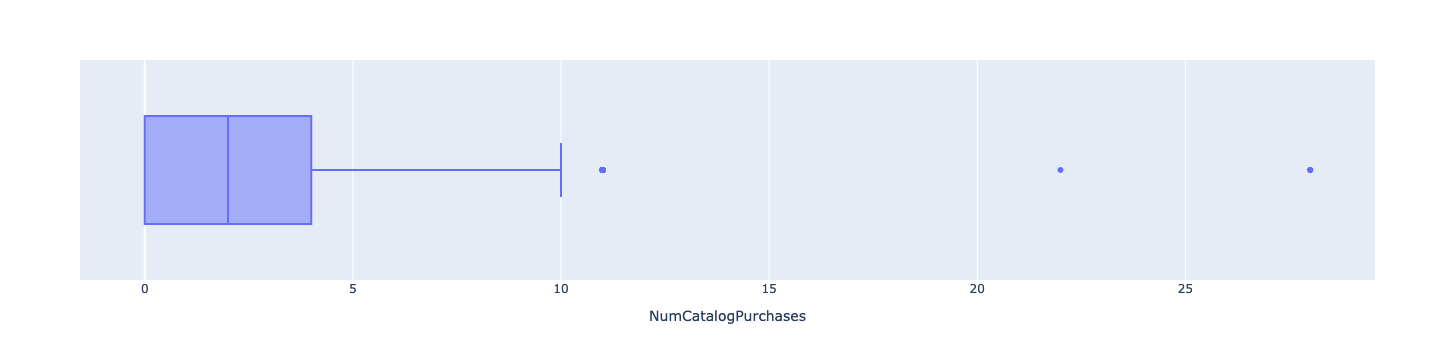

In [316]:
px.box(data_frame = data, x = 'NumCatalogPurchases')

In [317]:
data.NumCatalogPurchases.nlargest()

325     28
497     28
961     28
2204    22
292     11
Name: NumCatalogPurchases, dtype: int64

In [318]:
# Valores fuera de rango se dejan al ultimo valor mas alto 
data.NumCatalogPurchases.clip(upper=11, inplace=True)

### Matriz de correlacion

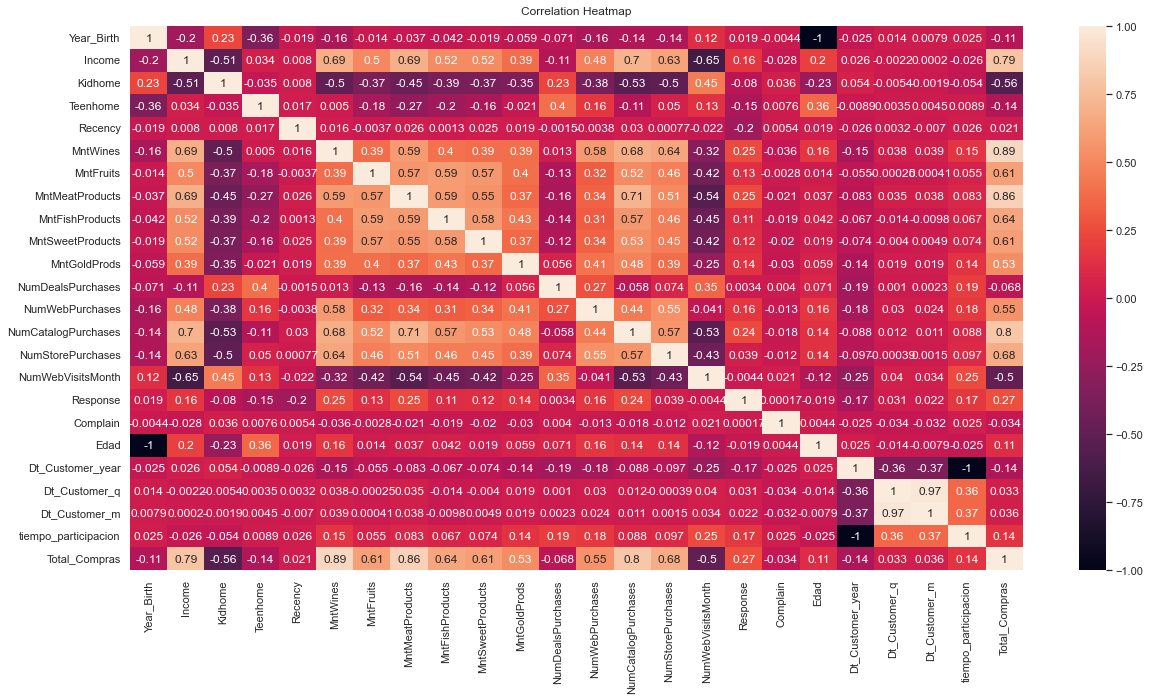

In [322]:
# Aumentar el espacio para el plot
plt.figure(figsize=(20, 10))
# Guardar las configuraciones del plot
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Titulos y otros settings
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Hay variables altamente correladas entre si, justamente algunas son de las que se habian creado para explorar o intentar obtener mas
del data set original

Hay correlaciones fuertes entre:
Total_Compras e Income
MntWines y Total_Compras
Total_Compras y Numwepurchases
Ademas las nuevas columnas creadas con Dt_customer tambien presentan fuerte correlacion
Para mantener independencia se eliminan

In [66]:
# Como se han transformado columnas para generar nuevas, se eliminan las originales

In [67]:
data.drop(columns=["Year_Birth","Dt_Customer", "Dt_Customer_q","Dt_Customer_m", "Total_Compras"],inplace=True)

In [68]:
temp = data.copy()

### OneHotEncoder/Transformacion de categoricas

In [69]:
# # Tenemos dos variables categoricas, Education y Marital_Status, se utiliza label encoding
# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# data['Marital_Status'] = lb_make.fit_transform(data['Marital_Status'])
# data['Education'] = lb_make.fit_transform(data['Education'])

# data.head(10)

In [70]:
# one-hot-encode using sklearn, crea columnas adicionales y borra las originales
one_hot = OneHotEncoder(use_cat_names=True)
limpio = one_hot.fit_transform(temp)


In [71]:
limpio.shape

(2236, 27)

In [72]:
# Guarda el dataset limpio para ser usado en autoML o en otro script
limpio.to_csv("superstore_clean.csv", encoding='utf-8', index=False)